In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
x=np.random.randint(-7,500,200)
#normalization(Standardization/Z-Score normalization) of values
u=np.mean(x,axis=0)
std=np.std(x,axis=0)
x=(x-u)/std

In [19]:
x

array([ 0.1231306 , -0.88072778,  0.23545042, -0.32614868, -1.57570666,
        0.89532936, -0.78946793, -1.4914668 , -0.72628803, -0.83158786,
       -1.75822637, -1.26682716,  0.91638933, -0.03130915, -1.34404704,
       -0.48760842, -0.82456787,  1.3656686 , -1.60378662, -1.10536742,
        0.40393015, -0.46654845, -0.89476776, -1.5546467 ,  0.57942987,
        1.64646815,  1.70262806, -1.80736629,  0.76194957,  1.71666804,
        1.35162862, -1.54762671, -0.41740853,  0.44605008, -1.28788713,
        0.02485076,  0.22843043, -1.10536742,  1.22526883, -1.34404704,
       -0.24190881,  0.25651039,  0.66366973,  1.14102896, -0.9930476 ,
       -0.35422863,  1.30950869, -0.03130915,  0.00379079, -0.67714811,
       -0.16468893, -1.0562275 ,  0.02485076, -1.25278718, -0.03130915,
       -1.27384715, -0.15766895,  1.19718887,  0.53028995,  1.15506894,
        1.02870914,  0.45307007, -0.16468893, -0.10852903,  0.1231306 ,
        0.41797013,  1.32354867,  0.64962975, -1.01410757,  1.60

In [4]:
type(x)

numpy.ndarray

In [5]:
y=[]
for i in x:
    #y=mx+c
    y.append(7.81*i+6.022)

In [6]:
print(type(y))
y=np.array(y)
print(type(y))

<class 'list'>
<class 'numpy.ndarray'>


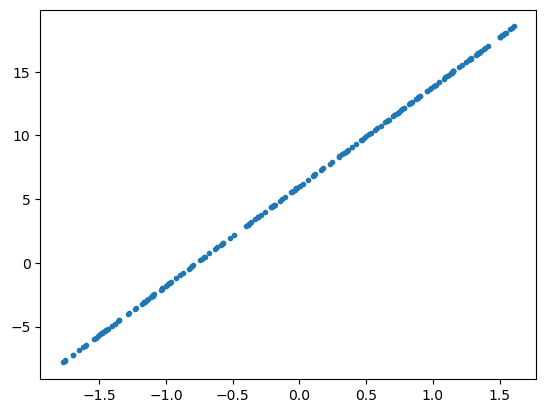

In [7]:
 #we are using scatter function coz both x and y are discrete but we can also use plt.plot() because y=mx+c is continuous
plt.scatter(x,y,marker='.')
plt.show()

In [8]:
#for prediction of value
def hypothesis(x,weights):
       #y =c+mx we want the prediction value to follow y=mx+c to predict value and it has to learn m and c by itself
    y_pred=weights[0]+weights[1]*x
    return y_pred

In [9]:
#we are taking x and weights as parameter beacuse in loss function we want y_pred and we are finding y_pred with x and weight
def loss_func(x,weights,y):
    loss=0
    for i in range(x.shape[0]):
        y_pred=hypothesis(x[i],weights)
        loss +=(y_pred-y[i])**2
     
    return loss/x.shape[0] #we can divide by 2 but we prefer x.shape[0],by dividing it with x.shape[0] we will expand the parabola that will made by loss

In [10]:
#gradient=dJ/dW
def gradient(x,y,weights):
    grad=np.zeros((2,))
    
    for i in range(x.shape[0]):
        y_pred=hypothesis(x[i],weights)
        grad[0] +=(y_pred-y[i]) #here we have not written x[i] coz x0=1
        grad[1] +=(y_pred-y[i])*x[i]
        
    return grad/x.shape[0] #same reason as above

In [11]:
def gradient_descent(x,y):
    weights=np.zeros((2,))
    lr_rate=0.003
    loss_epoch=[]
    
    epochs=5000 #it is the jump we have let to reach global minima
    
    for i in range(epochs):
        
        grad=gradient(x,y,weights)
        weights[0]=weights[0]-lr_rate*grad[0]
        weights[1]=weights[1]-lr_rate*grad[1]
        
        loss_epoch.append(loss_func(x,weights,y))
    return weights,loss_epoch

In [12]:
weights,loss_epoch=gradient_descent(x,y)

In [13]:
loss_epoch

[96.67789584125607,
 96.09869856727101,
 95.52297126415448,
 94.95069314331093,
 94.38184354068943,
 93.81640191603705,
 93.25434785215815,
 92.69566105417583,
 92.1403213488003,
 91.58830868359965,
 91.03960312627612,
 90.49418486394667,
 89.95203420242674,
 89.41313156552002,
 88.87745749431105,
 88.34499264646253,
 87.81571779551761,
 87.2896138302047,
 86.7666617537479,
 86.24684268318124,
 85.73013784866623,
 85.21652859281494,
 84.70599637001534,
 84.1985227457626,
 83.69408939599276,
 83.19267810642141,
 82.69427077188578,
 82.19884939569135,
 81.70639608896185,
 81.21689306999288,
 80.73032266361056,
 80.24666730053286,
 79.76590951673535,
 79.28803195282059,
 78.81301735339125,
 78.34084856642704,
 77.87150854266562,
 77.4049803349865,
 76.94124709779953,
 76.48029208643669,
 76.02209865654683,
 75.56665026349543,
 75.11393046176687,
 74.6639229043704,
 74.21661134225033,
 73.77197962369891,
 73.33001169377333,
 72.89069159371589,
 72.454003460378,
 72.01993152564687,
 71.5884

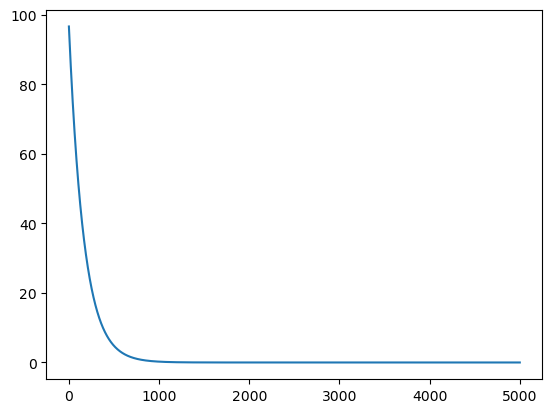

In [14]:
plt.plot(loss_epoch)
plt.show()

In [15]:
weights

array([6.0219982 , 7.80999766])

In [16]:
print(weights[0]+weights[1]*3)

29.45199119141093
